<a href="https://colab.research.google.com/github/shiwennn13/lstm/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [ ]:
#import file
from google.colab import files
upload_file = files.upload()

Saving NSE-TATAGLOBAL.csv to NSE-TATAGLOBAL.csv


In [ ]:
#read input
import io
df = pd.read_csv(io.BytesIO(upload_file['NSE-TATAGLOBAL.csv']))
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


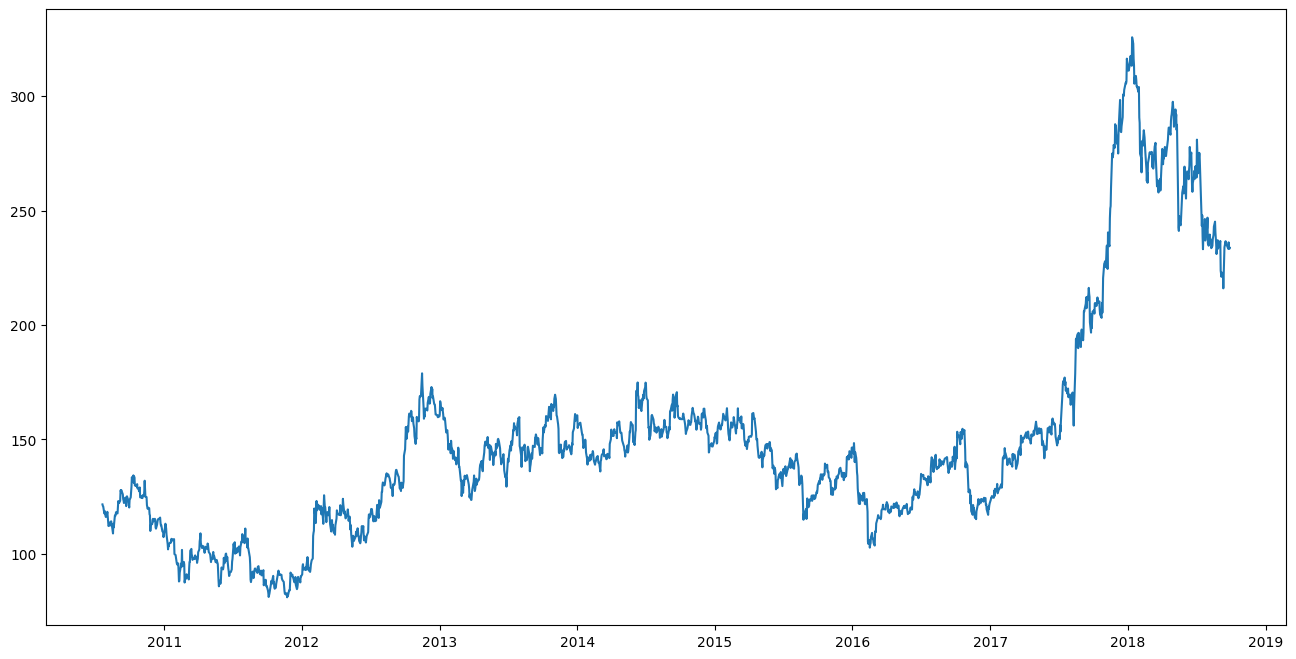

In [ ]:
#plot graph
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
#df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [ ]:
#sort dataset on date time and filter date and close column
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

print(new_dataset)


                     Date   Close
0     2010-07-21 00:00:00  121.55
1     2010-07-22 00:00:00   120.9
2     2010-07-23 00:00:00  120.65
3     2010-07-26 00:00:00   117.6
4     2010-07-27 00:00:00  118.65
...                   ...     ...
2030  2018-09-24 00:00:00   233.3
2031  2018-09-25 00:00:00   236.1
2032  2018-09-26 00:00:00  234.25
2033  2018-09-27 00:00:00  233.25
2034  2018-09-28 00:00:00  233.75

[2035 rows x 2 columns]


In [ ]:
#normalize the new filtered dataset
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset.index=new_dataset.Date
new_dataset.drop('Date',axis=1,inplace=True)
final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

scaled_data=scaler.fit_transform(final_dataset)

print(len(train_data))

x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))


987


In [ ]:
# build and train LSTM model
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.summary()
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
#lstm_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_45 (LSTM)              (None, 50)                20200     
                                                                 
 dense_21 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
927/927 - 28s - loss: 0.0011 - 28s/epoch - 30ms/step


In [ ]:
# take some sample dataset to predict using lstm model
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [ ]:
#save lstm model
lstm_model.save("saved_model.h5")

In [ ]:
#plot predicted stock costs with actual stock costs graph
train_data=new_dataset[:987] #column of the graph
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

NameError: ignored